<h1><center>Titanic Passengers</center></h1>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/300px-RMS_Titanic_3.jpg" />

In this HW assignment, you are going to explore a rather popular dataset in DS circles: Titanic Passengers. The dataset is available through seaborn. While the dataset contains many variables regarding the 891 passengers, of interest to this particular assignment are the following (in addition to age and sex):
- survived (0 or 1): indicates whether the passenger survived (1=survived)
- fare: the fee paid for the ticket
- class: passenger class (first, second, and third)
- alive (true or false): same as survived but contains string values


In [ ]:
# run this cell to import the dataset
import seaborn as sns
data = sns.load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Question 1

Write a code snippet that extracts the number of survivors in each passenger class from the data dataframe, as shown in the sample output below.

Your code snippet can consist of **two lines at most** (i.e., max of lines of code your answer can contain = 2). A one-line code snippet is ideal for this.

In [ ]:
df = data.groupby(['class', 'alive']).count()['survived'].reset_index()
df

,class,alive,survived
0,First,no,80
1,First,yes,136
2,Second,no,97
3,Second,yes,87
4,Third,no,372
5,Third,yes,119


### Question 2

Using plotly express, produce a bar graph to visualize the number of survivors as a function of passenger class as shown in the output below. Your graph must match the sample graph in all aspects. The name of the plotly theme used in the sample output is ggplot2. You are required to use the df dataframe from the previous question here.

In [ ]:
import plotly.express as px

fig = px.bar(df, x='class', y='survived', color='alive', barmode='group', template='ggplot2', title='Titanic Survivors',
            labels = {'class': 'Ticket Class', 'survived': 'Count'}, text='survived', width=400,
            color_discrete_map={'no': '#F2736A', 'yes': '#A3A500'})

fig.update_traces(textposition='inside')
fig.update_yaxes(nticks = 5)

fig.show()

<img src="https://i.ibb.co/M1XFF29/Unknown.png" alt="Unknown" border="0"/>


<hr>

Before proceeding to the next part, go ahead and clean up the dataframe a bit. Select from the data dataframe the six column shown in the output below and save them in a new dataframe called df_cleaned. Use the df_cleaned dataframe in the following questions.

In [ ]:
df_cleaned = data[['sex', 'age', 'alone', 'class', 'fare', 'alive']]
df_cleaned

,sex,age,alone,class,fare,alive
0,male,22.0,False,Third,7.2500,no
1,female,38.0,False,First,71.2833,yes
2,female,26.0,True,Third,7.9250,yes
3,female,35.0,False,First,53.1000,yes
4,male,35.0,True,Third,8.0500,no
...,...,...,...,...,...,...
886,male,27.0,True,Second,13.0000,no
887,female,19.0,True,First,30.0000,yes
888,female,NaN,False,Third,23.4500,no
889,male,26.0,True,First,30.0000,yes


### Question 3

Using seaborn, make an histogram of the fare values, as shown in the sample output below.

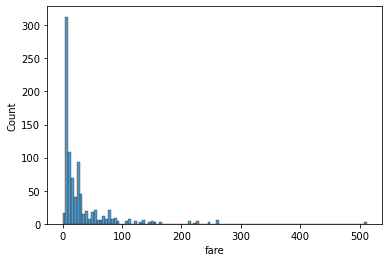

In [ ]:
graph = sns.histplot(data=df_cleaned, x='fare')

<img src="https://i.ibb.co/nr6ByPQ/sns1.png" alt="sns1" border="0"/>

In [ ]:
df_cleaned["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

As you can see, the fare values are not normally distributed. There are a couple values that are extremely high and make it harder to interpret the histogram. In the next question, you're going to try to mitigate this.

### Question 4

As we discussed, these extremely high values are known as outliers. It's our sincere hope that you do remember that for a normal distribution, a value that is below/above three standard deviations of the mean is very unlikely. We're going to use that here even though it's clear that the distribution of fares is not normal. Still, that's a common approach for outlier elimination, which is why you will use it here. 

Write a code snippet to delete the passengers whose fare is three standard deviations above the average fare (we won't worry about fares being three standard deviations below the mean, the reason behind which is for you to cogitate :)). Your code should perform this operation on the df_cleaned dataframe. The new version of the df_cleaned dataframe is shown below. Note that it now has 871 rows (as opposed to 891, the original # of rows).

Note that everything should be done computationally. You should not manually enter the rows to be deleted.

In [ ]:
df_cleaned = df_cleaned[df_cleaned['fare'] < df_cleaned['fare'].mean() + 3 * df_cleaned['fare'].std()]
df_cleaned

,sex,age,alone,class,fare,alive
0,male,22.0,False,Third,7.2500,no
1,female,38.0,False,First,71.2833,yes
2,female,26.0,True,Third,7.9250,yes
3,female,35.0,False,First,53.1000,yes
4,male,35.0,True,Third,8.0500,no
...,...,...,...,...,...,...
886,male,27.0,True,Second,13.0000,no
887,female,19.0,True,First,30.0000,yes
888,female,NaN,False,Third,23.4500,no
889,male,26.0,True,First,30.0000,yes


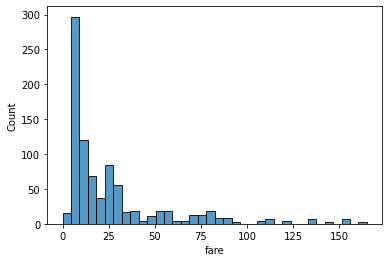

In [ ]:
graph = sns.histplot(data=df_cleaned, x='fare')

<img src="https://i.ibb.co/zsDWw3z/sns2.png" alt="sns2" border="0"/>

In [ ]:
# here are the descriptives
df_cleaned["fare"].describe()

count    871.000000
mean      26.530170
std       29.351184
min        0.000000
25%        7.895800
50%       13.862500
75%       30.000000
max      164.866700
Name: fare, dtype: float64

### Question 5 

Now that we've a better fares distribution (albeit not normal), let's look at some group comparisons. Using seaborn, make an histogram of the fare values for male and female passengers, as shown in the sample output below.

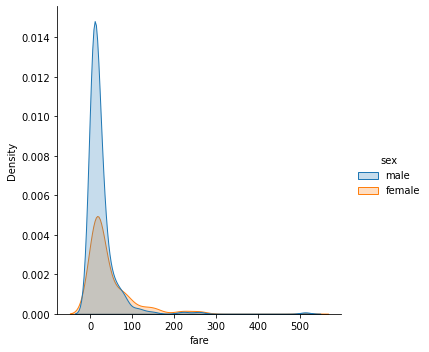

In [ ]:
graph = sns.displot(data=data, x='fare', hue='sex', kind='kde', fill=True)

<img src="https://i.ibb.co/hBYH20q/sns3.png" alt="sns3" border="0"/>

**Interpretation Question :**

- What can you say about the comparison between male passengers and female passengers with respect to the fares? How are they similar/different?

- Male and females have a similar average fare, however, the distribution for males is leptokurtic relative to the female distribution, so the fares were more consistent, with many observations being closer to the mean and tails, while the female distribution was more evenly spread out and had less values concentrated at the peak and tails.

### Question 6 

Using plotly expreess, produce a scatter plot to visualize the relationship between age and fare. The color of the dots should represent passenger class. Your graph should match the sample output. The theme used in the sample output is "ggplot2". 

In [ ]:
fig = px.scatter(df_cleaned, x='fare', y='age', color='class', template='ggplot2', 
                 title='Relationship between age and fare', 
                 labels = {'fare': 'Fare', 'age': 'Passenger Age'})

fig.update_xaxes(nticks = 7)
fig.update_yaxes(nticks = 6)

fig.show()

<img src="https://i.ibb.co/VNvNWBm/Unknown-2.png" alt="Unknown-2" border="0">

**Interpretation Question :**

- What can you say about the relationship between age and fare? Is there a discernible pattern? Why or why not?

- There appears to be no discernible pattern between age and fare. Across all 3 classes, we can identify vertical clusters associated with a fare price bin, indicating that passengers were paying a similar price across all ages.

### Note on embedding visualizations:
To guarantee your visualizations will appear on the Notebook when your TAs grade your assignments, please upload screenshots of your visualizations to https://imgbb.com/upload and embed them using the link you get into your Notebook. You will need to use Markdown cells. Your lecture Notebooks have many examples of how to embed an image inside a Notebook cell. Here is the line of code you will need to use to insert an image.

``` <img src="url goes here" /> ```

And here is an actual example. Pay attention to the URL. 

<img src = "https://i.ibb.co/yVZvDdq/figure2.png" width=400/>

**You're required to embed each figure in the Notebook using this approach (embed them under the corresponding question). 20% of the question points (for each figure missing) will be deducted otherwise.**